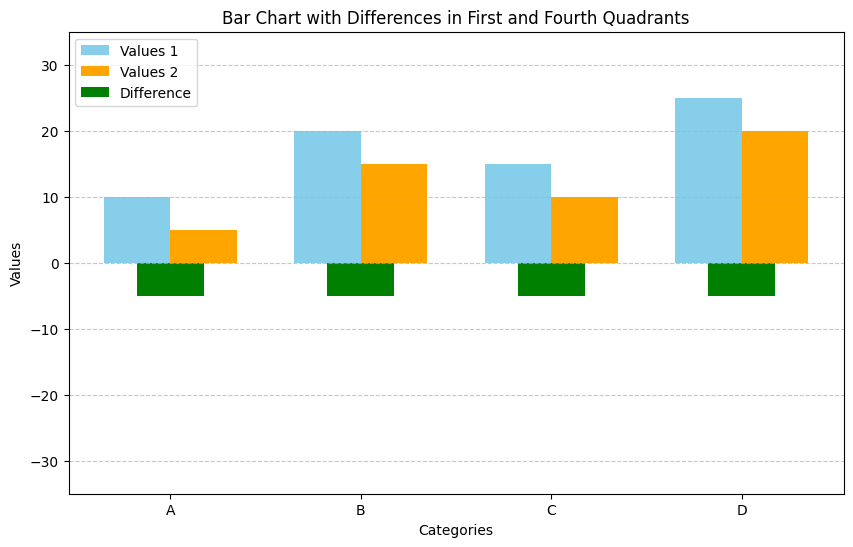

In [145]:
import matplotlib.pyplot as plt
import numpy as np

# 示例数据
categories = ['A', 'B', 'C', 'D']  # 类别
values_1 = [10, 20, 15, 25]  # 第一组数据
values_2 = [5, 15, 10, 20]   # 第二组数据

# 计算差值
differences = np.array(values_1) - np.array(values_2)

# 创建一个画布
fig, ax = plt.subplots(figsize=(10, 6))

# 第一象限的柱状图（表示每个类别的两个值）
width = 0.35  # 每个柱子的宽度
x = np.arange(len(categories))  # 类别的 x 位置

# 绘制第一组数据的柱子
ax.bar(x - width / 2, values_1, width, label='Values 1', color='skyblue', align='center')
# 绘制第二组数据的柱子
ax.bar(x + width / 2, values_2, width, label='Values 2', color='orange', align='center')

# 绘制第四象限的柱状图（表示差值，向下绘制）
ax.bar(x, -differences, width, label='Difference', color='green', align='center')

# 设置图表的标签和标题
ax.set_xlabel('Categories')
ax.set_ylabel('Values')
ax.set_title('Bar Chart with Differences in First and Fourth Quadrants')

# 设置 x 轴的刻度为类别标签
ax.set_xticks(x)
ax.set_xticklabels(categories)

# 设置 y 轴的范围，确保原点位于中间
ax.set_ylim(-max(values_1 + values_2) - 10, max(values_1 + values_2) + 10)

# 添加网格线帮助查看柱子的高度
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

# 添加图例
ax.legend()

# 显示图形
plt.show()


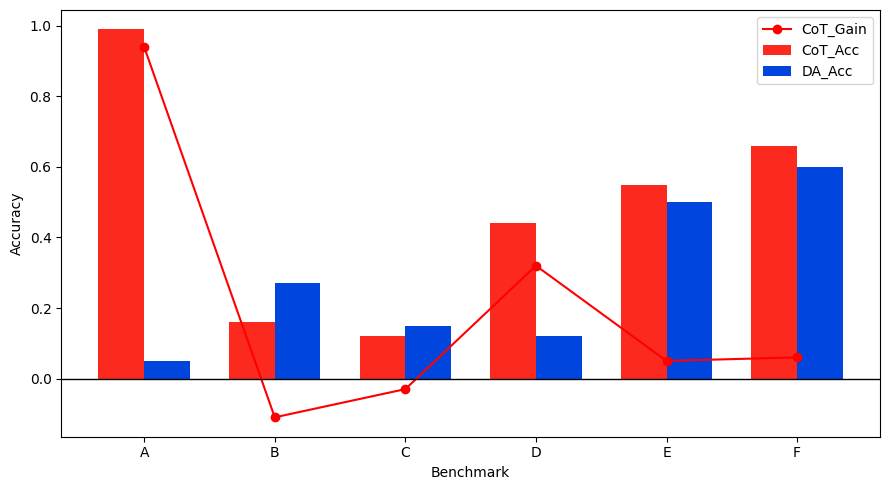

In [146]:
import numpy as np
import matplotlib.pyplot as plt

categories = ['A', 'B', 'C','D','E','F']
values1 = [0.990, 0.16, 0.12,0.44 ,0.55,0.66]
values2 = [0.05, 0.27, 0.15,0.12,0.5,0.6]

# 计算两组柱子之间的差值(也可以根据实际需求调整计算方式)
diff = [v1 - v2 for v1, v2 in zip(values1, values2)]

# 设置柱子的 x 轴刻度
x = np.arange(len(categories))  
bar_width = 0.35
plt.figure(figsize=(9, 5))
color1 = (0.990, 0.16, 0.12)  # 深红色
color2 = (0, 0.27, 0.87)   # 深蓝色

plt.bar(x - bar_width/2, values1, width=bar_width, color=color1, label='CoT_Acc')
plt.bar(x + bar_width/2, values2, width=bar_width, color=color2, label='DA_Acc')
plt.plot(x, diff, marker='o', color='red', label='CoT_Gain')
plt.axhline(y=0, color='black', linewidth=1)


plt.xticks(x, categories)
plt.xlabel('Benchmark')
plt.ylabel('Accuracy')

plt.legend()
plt.tight_layout()
plt.savefig('figure1.pdf', format='pdf')
# 显示图表
plt.show()


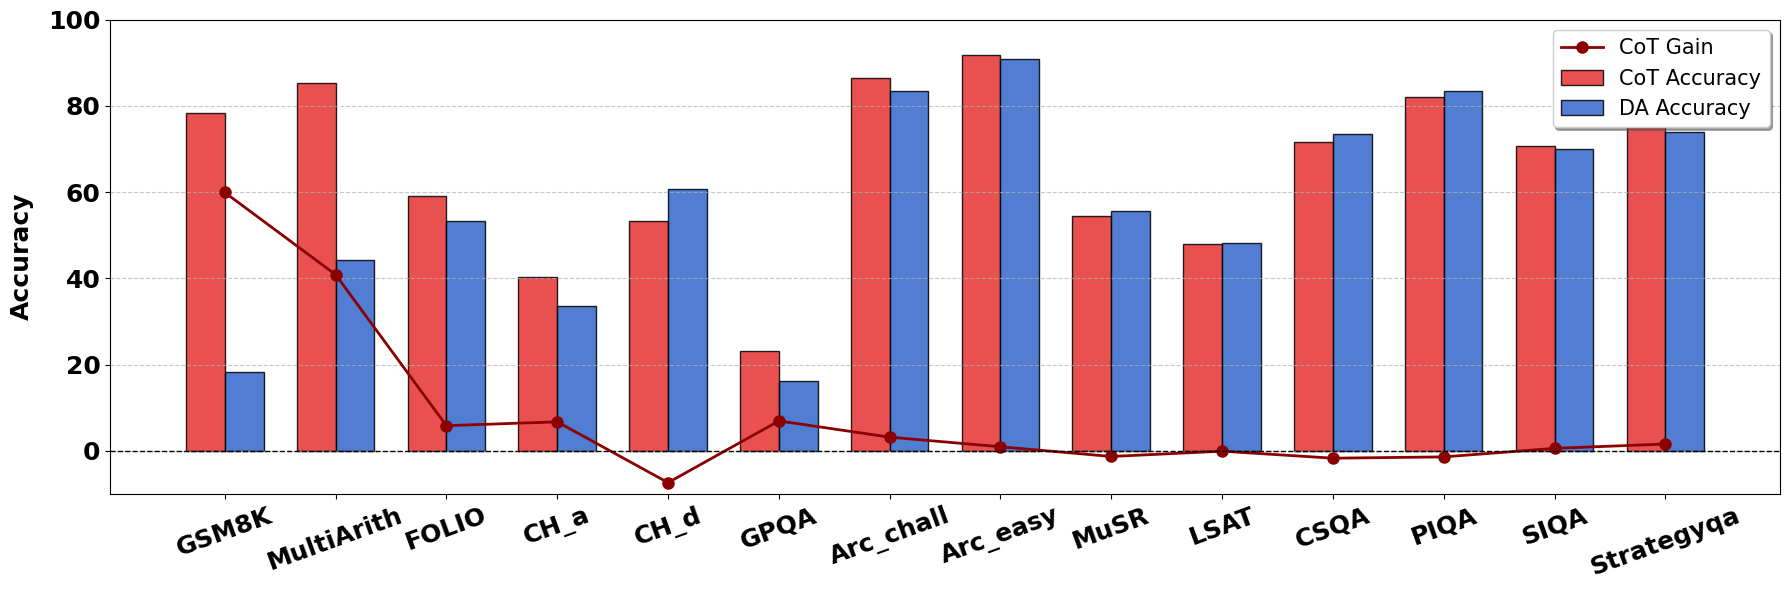

In [147]:
import numpy as np
import matplotlib.pyplot as plt

# 数据
categories = ["GSM8K","MultiArith" , "FOLIO" ,"CH_a", "CH_d" , "GPQA", "Arc_chall", "Arc_easy", "MuSR" ,"LSAT" ,"CSQA",  "PIQA", "SIQA", "Strategyqa"]
values1 = [78.24,85.17,59.14,40.29,53.25,23.21,86.52,91.71,54.37,47.97,71.66,81.99,70.57,75.46]
values2 = [18.35,44.33,53.32,33.58,60.64,16.29,83.36,90.78,55.69,48.07,73.38,83.41,70.01,73.89]



# 差值计算
diff = [v1 - v2 for v1, v2 in zip(values1, values2)]

# 设置画布和柱子宽度
x = np.arange(len(categories))
bar_width = 0.35
plt.figure(figsize=(18, 6))

# 定义颜色
color1 = (0.9, 0.2, 0.2)  # 改为柔和的红色
color2 = (0.2, 0.4, 0.8)  # 改为柔和的蓝色

# 绘制柱状图
plt.bar(x - bar_width / 2, values1, width=bar_width, color=color1, label='CoT Accuracy', edgecolor='black', alpha=0.85)
plt.bar(x + bar_width / 2, values2, width=bar_width, color=color2, label='DA Accuracy', edgecolor='black', alpha=0.85)

# 绘制差值折线图
plt.plot(x, diff, marker='o', color='darkred', label='CoT Gain', linewidth=2, markersize=8)
plt.axhline(y=0, color='black', linewidth=1, linestyle='--')

# 美化 x 轴
plt.xticks(x, categories, fontsize=18, fontweight='bold',rotation=20)
# plt.xlabel('Benchmark', fontsize=18, labelpad=10)

# 美化 y 轴
plt.ylabel('Accuracy', fontweight='bold',fontsize=18, labelpad=10)
plt.yticks(fontweight='bold',fontsize=18)
plt.ylim(-10, 100)  # 设置 y 轴范围

# # 添加标题
# plt.title('Comparison of CoT and DA Accuracies', fontsize=16, fontweight='bold', pad=15)

# 添加图例
plt.legend(fontsize=15, frameon=True, fancybox=True, shadow=True)

# 添加网格
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 调整布局
plt.tight_layout()

# 保存图表为 PDF
plt.savefig('figure1.pdf', format='pdf')

# 显示图表
plt.show()


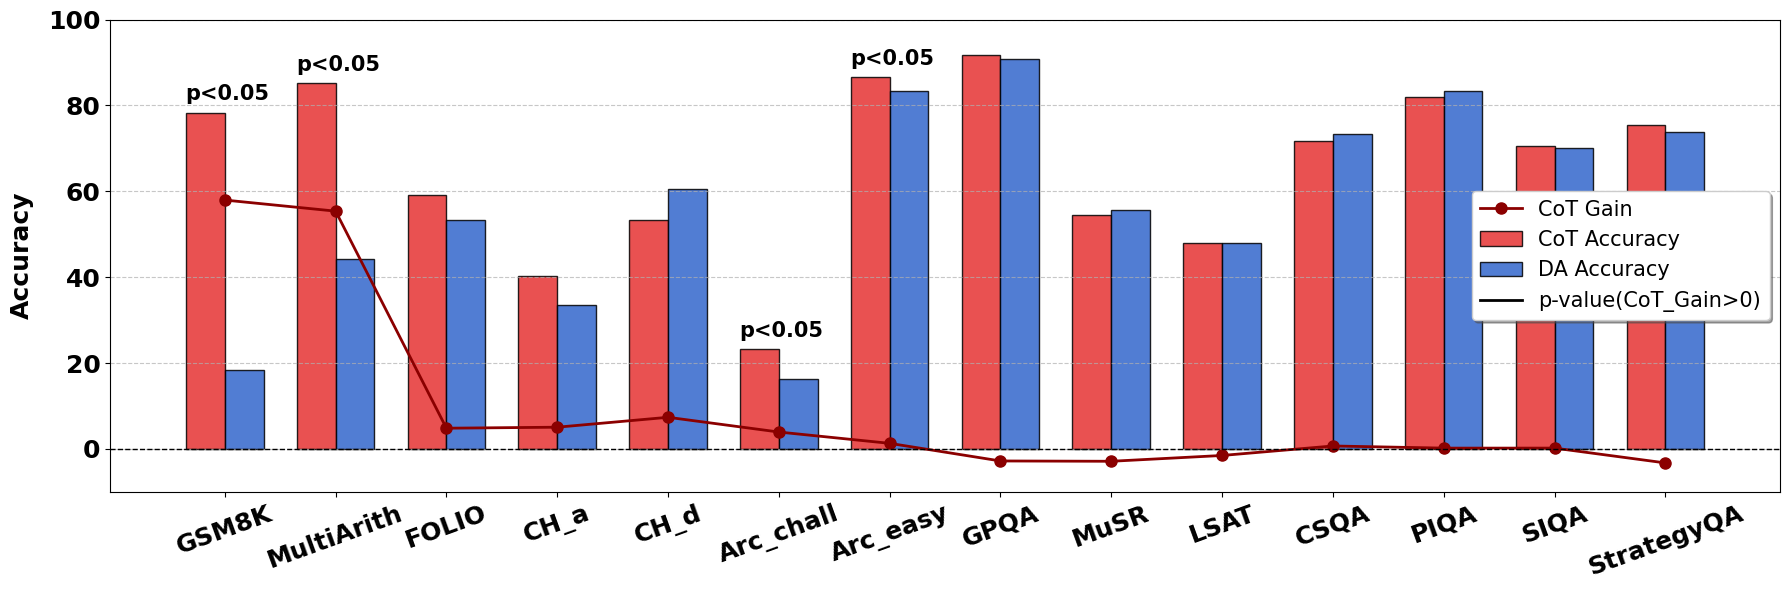

In [148]:
from matplotlib.lines import Line2D
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# 数据
categories = ["GSM8K","MultiArith" , "FOLIO" ,"CH_a", "CH_d" ,  "Arc_chall", "Arc_easy","GPQA", "MuSR" ,"LSAT" ,"CSQA",  "PIQA", "SIQA", "StrategyQA"]
values1_1 = [72.10,88.50,48.92,35.21,39.87,73.89,84.39,27.01,44.84,39.74,67.24,77.42,62.69,66.59]     #llama 3.2 3B
values2_1 = [ 8.34,20.67,42.61,33.54,19.92,69.88,83.46,37.72,50.93,40.73,65.60,75.68,62.33,79.69]
diff_1=[v1 - v2 for v1, v2 in zip(values1_1, values2_1)]

values1_2 = [78.24,85.17,59.14,40.29,53.25,86.52,91.71,23.21,53.37,47.97,71.66,81.99,70.57,75.46]     #phi-3.5
values2_2 = [18.35,44.33,53.32,33.58,60.64,83.36,90.78,16.29,55.69,48.07,73.38,83.41,70.01,73.89]
diff_2=[v1 - v2 for v1, v2 in zip(values1_2, values2_2)]

values1_3 = [49.58,77.67,49.42,32.37,55.92,76.45,86.99,30.58,45.90,45.00,70.93,80.20,62.64,86.16]     #mistral-7B
values2_3 = [ 8.34,14.33,51.00,30.17,59.04,73.63,84.68,34.60,47.35,46.58,69.12,81.77,63.56,82.93]
diff_3=[v1 - v2 for v1, v2 in zip(values1_3, values2_3)]

values1_4 = [81.20,91.00,58.22,40.21,57.87,85.32,89.73,28.79,50.13,47.67,74.37,84.11,69.50,71.88]     #llama 3.1 8B
values2_4 = [14.25,41.50,49.42,30.50,37.79,79.52,88.64,32.14,51.72,51.04,73.30,82.05,68.68,76.55]
diff_4=[v1 - v2 for v1, v2 in zip(values1_4, values2_4)]

diff= np.mean([diff_1, diff_2, diff_3, diff_4], axis=0)

# 进行 t 检验：对每个类别位置的 diff 值进行 t 检验，假设零值是 0
p_values = []
for i in range(len(categories)):
    # 获取当前类别的所有差异值
    sample = [diff_1[i], diff_2[i], diff_3[i], diff_4[i]]
    t_stat, p_value = stats.ttest_1samp(sample, 0)
    p_values.append(p_value)
    
# 设置画布和柱子宽度



p_judge=[]
for i in range(14):
    if p_values[i]<0.05:
        p_judge.append('p<0.05')
    else:
        p_judge.append('')


x = np.arange(len(categories))
bar_width = 0.35
color1 = (0.9, 0.2, 0.2)  # 改为柔和的红色
color2 = (0.2, 0.4, 0.8)  # 改为柔和的蓝色
plt.figure(figsize=(18, 6))
plt.bar(x - bar_width / 2, values1, width=bar_width, color=color1, label='CoT Accuracy', edgecolor='black', alpha=0.85)
plt.bar(x + bar_width / 2, values2, width=bar_width, color=color2, label='DA Accuracy', edgecolor='black', alpha=0.85)

plt.plot(x, diff, marker='o', color='darkred', label='CoT Gain', linewidth=2, markersize=8)
plt.axhline(y=0, color='black', linewidth=1, linestyle='--')
plt.xticks(x, categories, fontsize=18, fontweight='bold',rotation=20)

# 将 p 值添加到图表上
for i, p_judgex in enumerate(p_judge):
    plt.text(x[i] - bar_width / 2+0.2, max(values1[i], values2[i]) + 2, f'{p_judgex}', ha='center', va='bottom',fontweight='bold', fontsize=15)
    
legend_elements = [Line2D([0], [0], color='black', lw=2, label='p-value Text')]

plt.ylabel('Accuracy', fontweight='bold',fontsize=18, labelpad=10)
plt.yticks(fontweight='bold',fontsize=18)
plt.ylim(-10, 100)  

handles, labels = plt.gca().get_legend_handles_labels()
handles.extend(legend_elements)
labels.extend(['p-value(CoT_Gain>0)'])

plt.legend(handles=handles, labels=labels, fontsize=15, frameon=True, fancybox=True, shadow=True, loc='center right')

# plt.legend(handles=legend_elements, fontsize=12)
# plt.legend(fontsize=15, frameon=True, fancybox=True, shadow=True, loc='center right')   #, bbox_to_anchor=(1, 0.5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('figure1.pdf', format='pdf')
plt.show()
#p<0.05

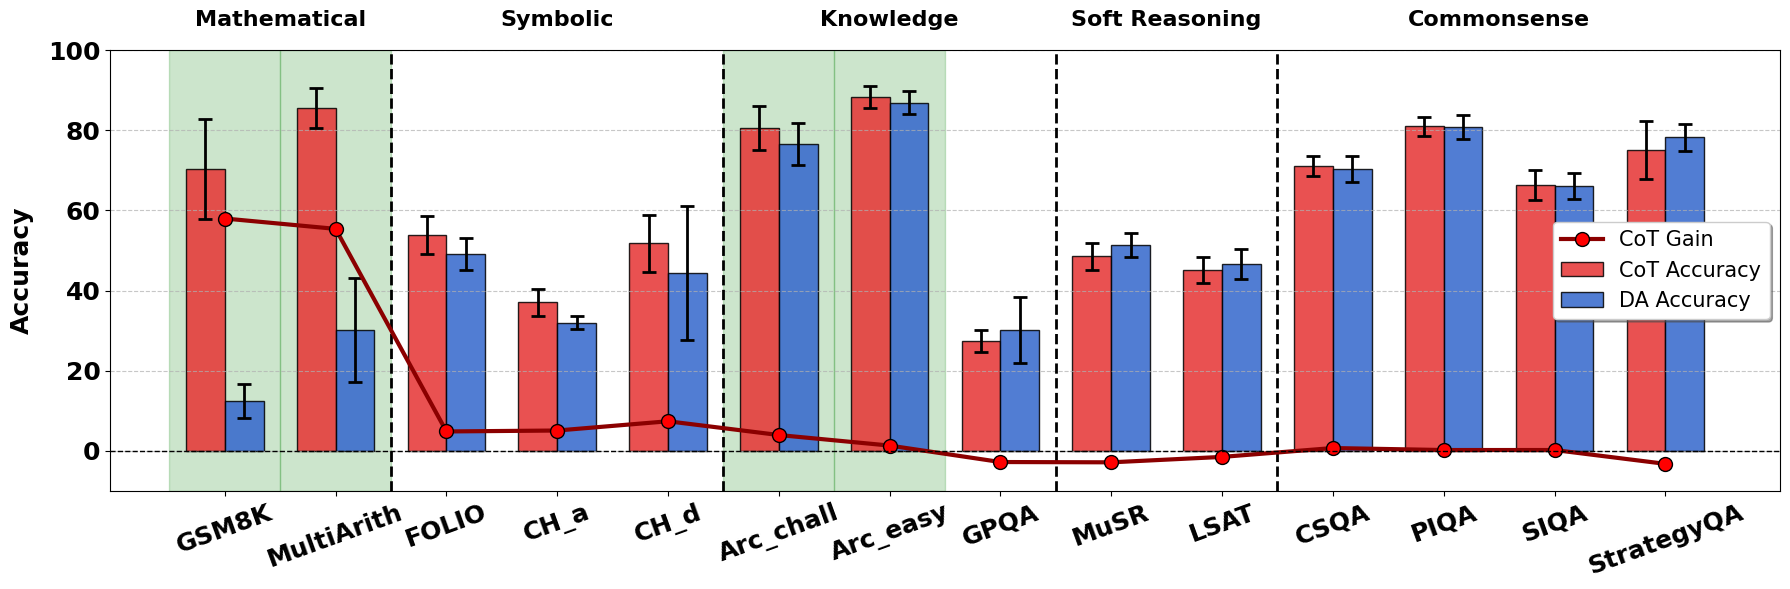

In [149]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
# 数据
categories = ["GSM8K","MultiArith" , "FOLIO" ,"CH_a", "CH_d" ,  "Arc_chall", "Arc_easy","GPQA", "MuSR" ,"LSAT" ,"CSQA",  "PIQA", "SIQA", "StrategyQA"]

values1 = np.mean([  
    [72.10,88.50,48.92,35.21,39.87,73.89,84.39,27.01,44.84,39.74,67.24,77.42,62.69,66.59],  
    [78.24,85.17,59.14,40.29,53.25,86.52,91.71,23.21,53.37,47.97,71.66,81.99,70.57,75.46],  
    [49.58,77.67,49.42,32.37,55.92,76.45,86.99,30.58,45.90,45.00,70.93,80.20,62.64,86.16],  
    [81.20,91.00,58.22,40.21,57.87,85.32,89.73,28.79,50.13,47.67,74.37,84.11,69.50,71.88]
], axis=0)

values2 = np.mean([  
    [ 8.34,20.67,42.61,33.54,19.92,69.88,83.46,37.72,50.93,40.73,65.60,75.68,62.33,79.69],  
    [18.35,44.33,53.32,33.58,60.64,83.36,90.78,16.29,55.69,48.07,73.38,83.41,70.01,73.89],  
    [ 8.34,14.33,51.00,30.17,59.04,73.63,84.68,34.60,47.35,46.58,69.12,81.77,63.56,82.93],  
    [14.25,41.50,49.42,30.50,37.79,79.52,88.64,32.14,51.72,51.04,73.30,82.05,68.68,76.55]
], axis=0)

# 计算标准差
std1 = np.std([  
    [72.10,88.50,48.92,35.21,39.87,73.89,84.39,27.01,44.84,39.74,67.24,77.42,62.69,66.59],  
    [78.24,85.17,59.14,40.29,53.25,86.52,91.71,23.21,53.37,47.97,71.66,81.99,70.57,75.46],  
    [49.58,77.67,49.42,32.37,55.92,76.45,86.99,30.58,45.90,45.00,70.93,80.20,62.64,86.16],  
    [81.20,91.00,58.22,40.21,57.87,85.32,89.73,28.79,50.13,47.67,74.37,84.11,69.50,71.88]
], axis=0)

std2 = np.std([  
    [ 8.34,20.67,42.61,33.54,19.92,69.88,83.46,37.72,50.93,40.73,65.60,75.68,62.33,79.69],  
    [18.35,44.33,53.32,33.58,60.64,83.36,90.78,16.29,55.69,48.07,73.38,83.41,70.01,73.89],  
    [ 8.34,14.33,51.00,30.17,59.04,73.63,84.68,34.60,47.35,46.58,69.12,81.77,63.56,82.93],  
    [14.25,41.50,49.42,30.50,37.79,79.52,88.64,32.14,51.72,51.04,73.30,82.05,68.68,76.55]
], axis=0)

diff = values1 - values2

x = np.arange(len(categories))
bar_width = 0.35
color1 = (0.9, 0.2, 0.2)  
color2 = (0.2, 0.4, 0.8)  

plt.figure(figsize=(18, 6))

# 定义 error_kw 以正确美化误差棒
error_kw = {
    "capsize": 5,       # 误差棒帽子的大小
    "capthick": 2,      # 帽子的厚度
    "elinewidth": 2,    # 误差棒的线宽
    "ecolor": "black"   # 误差棒颜色
}

# 绘制带美化误差棒的柱状图
plt.bar(x - bar_width / 2, values1, width=bar_width, color=color1, label='CoT Accuracy', 
        edgecolor='black', alpha=0.85, yerr=std1, error_kw=error_kw)

plt.bar(x + bar_width / 2, values2, width=bar_width, color=color2, label='DA Accuracy', 
        edgecolor='black', alpha=0.85, yerr=std2, error_kw=error_kw)

# 添加虚线分隔
section_boundaries = [1.5, 4.5, 7.5, 9.5]  # 更新的分隔位置
section_titles = ['Mathematical', 'Symbolic', 'Knowledge', 'Soft Reasoning', 'Commonsense']

for boundary in section_boundaries:
    plt.axvline(x=boundary, color='black', linestyle='--', linewidth=2)

# 添加标题文本
# for i, (boundary, title) in enumerate(zip(section_boundaries, section_titles)):
plt.text(0.5, 105, 'Mathematical', ha='center', va='bottom', fontsize=16, fontweight='bold', color='black')
plt.text(3, 105, 'Symbolic', ha='center', va='bottom', fontsize=16, fontweight='bold', color='black')
plt.text(6, 105, 'Knowledge', ha='center', va='bottom', fontsize=16, fontweight='bold', color='black')
plt.text(8.5, 105, 'Soft Reasoning', ha='center', va='bottom', fontsize=16, fontweight='bold', color='black')
plt.text(11.5, 105, 'Commonsense', ha='center', va='bottom', fontsize=16, fontweight='bold', color='black')


# 绘制差异折线图
plt.plot(x, diff, marker='o', color='darkred', label='CoT Gain', linewidth=3, markersize=10, markeredgecolor='black', markerfacecolor='red')

plt.axhline(y=0, color='black', linewidth=1, linestyle='--')

plt.xticks(x, categories, fontsize=18, fontweight='bold', rotation=20)
plt.ylabel('Accuracy', fontweight='bold', fontsize=18, labelpad=10)
plt.yticks(fontweight='bold', fontsize=18)
plt.ylim(-10, 100)  
plt.legend(fontsize=15, frameon=True, fancybox=True, shadow=True)
plt.grid(axis='y', linestyle='--', alpha=0.7)

#  给特定类别的横轴标题添加绿色阴影
highlight_categories = ["GSM8K", "MultiArith", "Arc_chall", "Arc_easy"]
for idx, label in enumerate(categories):
    if label in highlight_categories:
        plt.gca().add_patch(plt.Rectangle((idx - 0.5, -10), 1, 110, color='green', alpha=0.2, zorder=-1))



plt.tight_layout()
plt.savefig('figure1_with_beautiful_errorbar.pdf', format='pdf')
plt.show()


In [150]:
diff_1, diff_2, diff_3, diff_4

([63.75999999999999,
  67.83,
  6.310000000000002,
  1.6700000000000017,
  19.949999999999996,
  4.010000000000005,
  0.9300000000000068,
  -10.709999999999997,
  -6.089999999999996,
  -0.9899999999999949,
  1.6400000000000006,
  1.7399999999999949,
  0.35999999999999943,
  -13.099999999999994],
 [59.88999999999999,
  40.84,
  5.82,
  6.710000000000001,
  -7.390000000000001,
  3.1599999999999966,
  0.9299999999999926,
  6.920000000000002,
  -2.3200000000000003,
  -0.10000000000000142,
  -1.7199999999999989,
  -1.4200000000000017,
  0.5599999999999881,
  1.5699999999999932],
 [41.239999999999995,
  63.34,
  -1.5799999999999983,
  2.1999999999999957,
  -3.1199999999999974,
  2.8200000000000074,
  2.309999999999988,
  -4.020000000000003,
  -1.4500000000000028,
  -1.5799999999999983,
  1.8100000000000023,
  -1.5699999999999932,
  -0.9200000000000017,
  3.2299999999999898],
 [66.95,
  49.5,
  8.799999999999997,
  9.71,
  20.08,
  5.799999999999997,
  1.0900000000000034,
  -3.350000000000001

In [151]:
p_values

[0.002086908892289943,
 0.002989390991342603,
 0.11923304605251969,
 0.07708986829708092,
 0.3891353535567011,
 0.009607861386623597,
 0.029147222210115873,
 0.4989853508026869,
 0.0790095171252408,
 0.11663269655453347,
 0.45704544699119726,
 0.8499325537833825,
 0.6327052234042778,
 0.4453269594473937]

In [152]:
print(diff_1,diff_2,diff_3,diff_4)

[63.75999999999999, 67.83, 6.310000000000002, 1.6700000000000017, 19.949999999999996, 4.010000000000005, 0.9300000000000068, -10.709999999999997, -6.089999999999996, -0.9899999999999949, 1.6400000000000006, 1.7399999999999949, 0.35999999999999943, -13.099999999999994] [59.88999999999999, 40.84, 5.82, 6.710000000000001, -7.390000000000001, 3.1599999999999966, 0.9299999999999926, 6.920000000000002, -2.3200000000000003, -0.10000000000000142, -1.7199999999999989, -1.4200000000000017, 0.5599999999999881, 1.5699999999999932] [41.239999999999995, 63.34, -1.5799999999999983, 2.1999999999999957, -3.1199999999999974, 2.8200000000000074, 2.309999999999988, -4.020000000000003, -1.4500000000000028, -1.5799999999999983, 1.8100000000000023, -1.5699999999999932, -0.9200000000000017, 3.2299999999999898] [66.95, 49.5, 8.799999999999997, 9.71, 20.08, 5.799999999999997, 1.0900000000000034, -3.3500000000000014, -1.5899999999999963, -3.3699999999999974, 1.0700000000000074, 2.0600000000000023, 0.819999999999